In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import math
from matplotlib import ticker

# Plot New Transient Data: Experiment 1: Lower friction

In [2]:
Data = {'Time': [], 'SeaLevel': [], 'GroundedArea': [], 'Area':[], 'MaxHeights': [], 'Velocity': []}

for i in range(0, 477):
    dataSeaLevel     = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Experiment1Tol6/Transient/PlotData/SeaLevel2_' + str(i) + '.csv')
    dataArea         = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Experiment1Tol6/Transient/PlotData/Area_' + str(i) + '.csv')
    dataGroundedArea = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Experiment1Tol6/Transient/PlotData/GroundedArea_' + str(i) + '.csv')
    dataVx           = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/Experiment1Tol6/Transient/PlotData/Vx_' + str(i) + '.csv')
    Data['Time'].append(i*25 + 2000)
    Data['SeaLevel'].append(dataSeaLevel['sea level'][10])
    Vel = dataVx['velocity:0'].tolist()
    Data['Velocity'].append(Vel[0])
    Data['GroundedArea'].append(dataGroundedArea['Area'][0])
    Data['Area'].append(dataArea['Area'][0])
    zs = dataSeaLevel['Points:2'].tolist()
    MaxHeight = 0.0
    for i in zs:
        if i > MaxHeight:
            MaxHeight = i
    Data['MaxHeights'].append(MaxHeight)

df = pd.DataFrame(data=Data)    
    
df['MaxHeights'] = df['MaxHeights']+80.0
df['AverageVelocity'] = df['Velocity']/df['Area']
df['Thickness'] = df['Area']/60000.0
df['GroundedArea'] = df['GroundedArea']/10e6
dataSeaLevel

,Time,sea level,Points:0,Points:1,Points:2
0,476,-40,30535.0,-30000.0,-12.590
1,476,-40,28564.0,-30000.0,-12.478
2,476,-40,19781.0,-30000.0,-12.282
3,476,-40,17633.0,-30000.0,-12.328
4,476,-40,15893.0,-30000.0,-12.391
...,...,...,...,...,...
5662,476,-40,16205.0,20231.0,-10.718
5663,476,-40,17393.0,28634.0,-12.532
5664,476,-40,21210.0,27196.0,-12.237
5665,476,-40,15221.0,21716.0,-11.259


# Plot New Transient Data: Experiment 1: Higher friction

In [3]:
Data2 = {'Time': [], 'SeaLevel': [], 'GroundedArea': [], 'Area':[], 'MaxHeights': [], 'Velocity': []}

for i in range(0, 483):
    dataSeaLevel2     = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/HFCycle1/Data/SeaLevel_' + str(i) + '.csv')
    dataArea2         = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/HFCycle1/Data/Area_' + str(i) + '.csv')
    dataGroundedArea2 = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/HFCycle1/Data/GroundedArea_' + str(i) + '.csv')
    dataVx2           = pd.read_csv('/Users/clara.henry/Documents/ElmerFiles/FilesForPaper/HFCycle1/Data/Vx_' + str(i) + '.csv')
    Data2['Time'].append(i*25 + 2000)
    Data2['SeaLevel'].append(dataSeaLevel2['sea level'][10])
    Vel2 = dataVx2['velocity:0'].tolist()
    Data2['Velocity'].append(Vel2[0])
    Data2['GroundedArea'].append(dataGroundedArea2['Area'][0])
    Data2['Area'].append(dataArea2['Area'][0])
    zs = dataSeaLevel2['Points:2'].tolist()
    MaxHeight = 0.0
    for i in zs:
        if i > MaxHeight:
            MaxHeight = i
    Data2['MaxHeights'].append(MaxHeight)

df2 = pd.DataFrame(data=Data2)    
    
df2['MaxHeights'] = df2['MaxHeights']+80.0
df2['AverageVelocity'] = df2['Velocity']/df2['Area']
df2['Thickness'] = df2['Area']/60000.0
df2['GroundedArea'] = df2['GroundedArea']/10e6
dataSeaLevel2


,Time,sea level,Points:0,Points:1,Points:2
0,482,-40,29824.0,-6758.5,-440.540
1,482,-40,30555.0,-7502.4,-428.270
2,482,-40,29248.0,-7409.5,-422.510
3,482,-40,30808.0,-8016.3,-417.490
4,482,-40,24943.0,-12952.0,-343.430
...,...,...,...,...,...
77045,482,-40,20285.0,23556.0,-10.924
77046,482,-40,12029.0,24068.0,-11.627
77047,482,-40,13983.0,24624.0,-11.601
77048,482,-40,21066.0,28717.0,-12.034


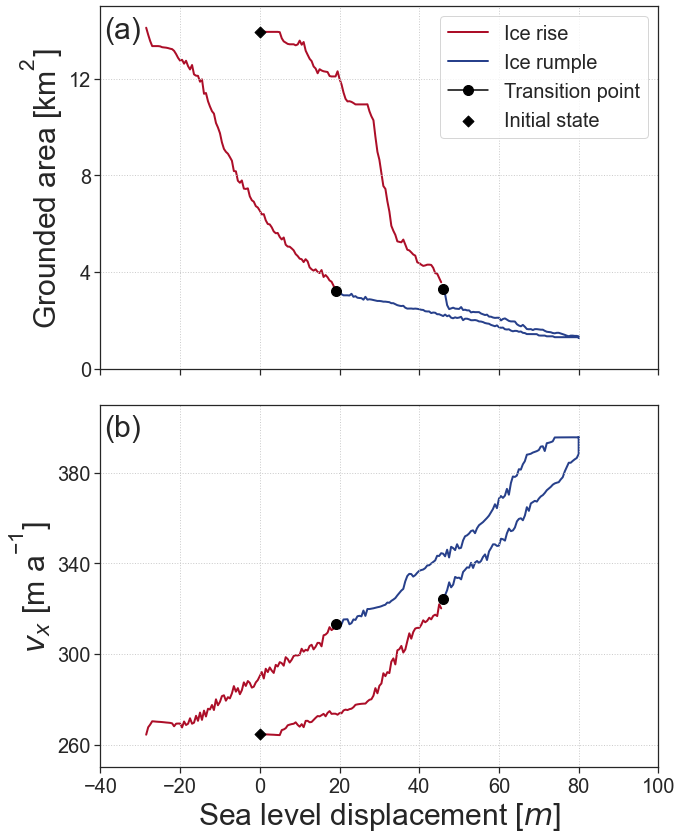

In [7]:
sns.set_theme(style="ticks")
fig, ax = plt.subplots(2, 1, figsize=(10,14), sharex='col', sharey='row')

# Dark Rise: "#ac0e28" , Rumple: "#27408B"

# Plot 0

ax[0].plot(df2.SeaLevel[0:94], df2.GroundedArea[0:94], color="#ac0e28", label="Ice rise", linewidth = 2.0, zorder=0)
ax[0].plot(df2.SeaLevel[94:364], df2.GroundedArea[94:364], color="#27408B", label="Ice rumple", linewidth = 2.0, zorder=0)
ax[0].plot(df2.SeaLevel[364:460], df2.GroundedArea[364:460], color="#ac0e28", linewidth = 2.0, zorder=0)
ax[0].scatter(df2.SeaLevel[0], df2.GroundedArea[0], color="black", marker='D', s=60, label='Initial state')

# Plot 1

ax[1].plot(df2.SeaLevel[0:94], df2.AverageVelocity[0:94], color="#ac0e28", linewidth = 2.0, zorder=0)
ax[1].plot(df2.SeaLevel[94:364], df2.AverageVelocity[94:364], color="#27408B", linewidth = 2.0, zorder=0)
ax[1].plot(df2.SeaLevel[364:460], df2.AverageVelocity[364:460], color="#ac0e28", linewidth = 2.0, zorder=0)
ax[1].scatter(df2.SeaLevel[0], df2.AverageVelocity[0], color="black", marker='D', s=60)

################################################################################################################

ax[0].plot(df2.SeaLevel[94], df2.GroundedArea[94], marker="o", color="black", label="Transition point", markersize=10)
ax[0].plot(df2.SeaLevel[364], df2.GroundedArea[364], marker="o", color="black", markersize=10)
ax[1].plot(df2.SeaLevel[94], df2.AverageVelocity[94], marker="o", color="black", markersize=10)
ax[1].plot(df2.SeaLevel[364], df2.AverageVelocity[364], marker="o", color="black", markersize=10)
ax[1].set_xlabel("Sea level displacement [$m$]", fontsize=30)

ax[0].set_ylabel("Grounded area [km$\mathregular{^{2}}$]", fontsize=30)
ax[1].set_ylabel("$v_x$ [m a$\mathregular{^{-1}}$]", fontsize=30)

ax[0].tick_params(axis="both", labelsize=20)
ax[1].tick_params(axis="both", labelsize=20)
ax[0].tick_params(axis="both", labelsize=20)
ax[1].tick_params(axis="both", labelsize=20)

ax[1].yaxis.get_offset_text().set_fontsize(24)

ax[0].set_xlim(-40,100)
ax[1].set_xlim(-40,100)

ax[0].set_yticks(np.arange(0, 15, 4))
ax[0].set_ylim(0,15)

ax[1].set_yticks(np.arange(260, 400, 40))
ax[1].set_ylim(250,410)

ax[0].legend(fontsize=20, title_fontsize='50', scatterpoints=1)

ax[0].grid(linestyle=':')
ax[1].grid(linestyle=':')

plt.subplots_adjust(wspace=0.08, hspace=0.1)

ax[0].text(0.04, 0.935, '(a)', size=30, horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes)
ax[1].text(0.04, 0.935, '(b)', size=30, horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes)

fig.savefig('IntermediateHysteresis.jpg', format='jpg', dpi=700, bbox_inches = "tight")


In [42]:
df2.SeaLevel[0]

0.0

In [43]:
df2.SeaLevel[80]

39.0

In [44]:
df2.AverageVelocity[400] - df2.AverageVelocity[0]

24.701744664219007